In [12]:
import pandas as pd

df_final = pd.read_csv(
    './Dataset/phl_exoplanet_preprocessed_no_sampling.csv'
)

y = df_final['P_HABITABLE']
X_scaled = df_final.drop(columns=['P_HABITABLE'])


In [13]:
# Features and target
X = X_scaled
y = y

# Split (70% train, 30% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training class distribution:\n", y_train.value_counts(normalize=True))
print("\nTesting class distribution:\n", y_test.value_counts(normalize=True))


Training class distribution:
 P_HABITABLE
0    0.986234
2    0.008472
1    0.005295
Name: proportion, dtype: float64

Testing class distribution:
 P_HABITABLE
0    0.986831
2    0.008230
1    0.004938
Name: proportion, dtype: float64


In [14]:
from imblearn.over_sampling import SMOTE
print("SMOTE imported successfully ✅")


SMOTE imported successfully ✅


In [15]:
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

print("Before SMOTE:")
print(y_train.value_counts())

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit only on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new distribution
print("After SMOTE - Training class distribution:\n", y_train_smote.value_counts())

Before SMOTE:
P_HABITABLE
0    2794
2      24
1      15
Name: count, dtype: int64
After SMOTE - Training class distribution:
 P_HABITABLE
0    2794
1    2794
2    2794
Name: count, dtype: int64


In [16]:
train_smote_df = X_train_smote.copy()
train_smote_df['P_HABITABLE'] = y_train_smote.values
train_smote_df.to_csv('./Dataset/phl_exoplanet_train_smote.csv', index=False)

test_df = X_test.copy()
test_df['P_HABITABLE'] = y_test.values
test_df.to_csv('./Dataset/phl_exoplanet_test.csv', index=False)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

# =========================
# 1. Load dataset
# =========================
df_final = pd.read_csv(
    './Dataset/phl_exoplanet_preprocessed_no_sampling.csv'
)

# =========================
# 2. Features & target
# =========================
X = df_final.drop(columns=['P_HABITABLE'])
y = df_final['P_HABITABLE']

# =========================
# 3. Train-test split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Training class distribution:\n", y_train.value_counts())
print("\nTesting class distribution:\n", y_test.value_counts())

# =========================
# 4. SMOTE
# =========================
print("\nBefore SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())

# Save SMOTE training data
train_smote_df = pd.DataFrame(
    X_train_smote,
    columns=X.columns
)
train_smote_df['P_HABITABLE'] = y_train_smote.values

train_smote_df.to_csv(
    './Dataset/phl_exoplanet_train_smote.csv',
    index=False
)

# Save test data (NO SMOTE on test)
test_df = X_test.copy()
test_df['P_HABITABLE'] = y_test.values
test_df.to_csv(
    './Dataset/phl_exoplanet_test.csv',
    index=False
)

# =========================
# 5. Borderline-SMOTE
# =========================
bl_smote = BorderlineSMOTE(random_state=42)
X_train_bl, y_train_bl = bl_smote.fit_resample(X_train, y_train)

print("\nBorderline-SMOTE class distribution:")
print(pd.Series(y_train_bl).value_counts())

# Save Borderline-SMOTE training data
train_bl_resampled = pd.DataFrame(
    X_train_bl,
    columns=X.columns
)
train_bl_resampled['P_HABITABLE'] = y_train_bl.values

train_bl_resampled.to_csv(
    './Dataset/phl_exoplanet_train_bl_smote.csv',
    index=False
)

print("\n✅ All datasets saved successfully")


Training class distribution:
 P_HABITABLE
0    2794
2      24
1      15
Name: count, dtype: int64

Testing class distribution:
 P_HABITABLE
0    1199
2      10
1       6
Name: count, dtype: int64

Before SMOTE:
P_HABITABLE
0    2794
2      24
1      15
Name: count, dtype: int64

After SMOTE:
P_HABITABLE
0    2794
1    2794
2    2794
Name: count, dtype: int64

Borderline-SMOTE class distribution:
P_HABITABLE
0    2794
1    2794
2    2794
Name: count, dtype: int64

✅ All datasets saved successfully


In [30]:
from imblearn.over_sampling import BorderlineSMOTE
import pandas as pd

bl_smote = BorderlineSMOTE(random_state=42)
X_train_bl, y_train_bl = bl_smote.fit_resample(X_train, y_train)

print("Borderline-SMOTE class distribution:")
print(pd.Series(y_train_bl).value_counts())

train_bl_resampled = pd.DataFrame(
    X_train_bl,
    columns=X.columns
)
train_bl_resampled['P_HABITABLE'] = y_train_bl.values

train_bl_resampled.to_csv(
    './Dataset/phl_exoplanet_train_bl_smote.csv',
    index=False
)


Borderline-SMOTE class distribution:
P_HABITABLE
0    2794
1    2794
2    2794
Name: count, dtype: int64


In [31]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)

print("SMOTE + Tomek Links class distribution:")
print(pd.Series(y_train_st).value_counts())

train_st_resampled = pd.DataFrame(
    X_train_st,
    columns=X.columns
)
train_st_resampled['P_HABITABLE'] = y_train_st.values

train_st_resampled.to_csv(
    './Dataset/phl_exoplanet_train_smote_tomek.csv',
    index=False
)


SMOTE + Tomek Links class distribution:
P_HABITABLE
0    2794
1    2794
2    2794
Name: count, dtype: int64


In [32]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_ad, y_train_ad = adasyn.fit_resample(X_train, y_train)

print("ADASYN class distribution:")
print(pd.Series(y_train_ad).value_counts())

train_ad_resampled = pd.DataFrame(
    X_train_ad,
    columns=X.columns
)
train_ad_resampled['P_HABITABLE'] = y_train_ad.values

train_ad_resampled.to_csv(
    './Dataset/phl_exoplanet_train_adasyn.csv',
    index=False
)


ADASYN class distribution:
P_HABITABLE
1    2799
2    2798
0    2794
Name: count, dtype: int64


In [ ]:
results_df = pd.DataFrame(results).T
results_df.sort_values(by="F1", ascending=False)


In [33]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_clf = SVC(
    kernel='linear',
    class_weight='balanced',
    random_state=42
)

svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

print("SVM - Class-weighted")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM - Class-weighted
[[1187    4    8]
 [   1    4    1]
 [   6    3    1]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1199
           1       0.36      0.67      0.47         6
           2       0.10      0.10      0.10        10

    accuracy                           0.98      1215
   macro avg       0.49      0.59      0.52      1215
weighted avg       0.98      0.98      0.98      1215



In [34]:
import xgboost as xgb

num_neg = (y_train == 0).sum()
num_pos = (y_train == 1).sum()
scale = num_neg / num_pos

xgb_clf = xgb.XGBClassifier(
    scale_pos_weight=scale,
    eval_metric='logloss',
    random_state=42
)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


C:\Users\Raji_kabilan\miniconda3\envs\exoplanet\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:38:34] WARNING: D:\bld\xgboost-split_1765326876395\work\src\learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost
[[1198    1    0]
 [   0    6    0]
 [   1    0    9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1199
           1       0.86      1.00      0.92         6
           2       1.00      0.90      0.95        10

    accuracy                           1.00      1215
   macro avg       0.95      0.97      0.96      1215
weighted avg       1.00      1.00      1.00      1215



In [35]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf_clf = BalancedRandomForestClassifier(
    n_estimators=100,
    random_state=42
)

brf_clf.fit(X_train, y_train)
y_pred_brf = brf_clf.predict(X_test)

print("Balanced Random Forest")
print(confusion_matrix(y_test, y_pred_brf))
print(classification_report(y_test, y_pred_brf))


C:\Users\Raji_kabilan\miniconda3\envs\exoplanet\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Raji_kabilan\miniconda3\envs\exoplanet\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Raji_kabilan\miniconda3\envs\exoplanet\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silenc

Balanced Random Forest
[[1117   10   72]
 [   0    5    1]
 [   0    1    9]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1199
           1       0.31      0.83      0.45         6
           2       0.11      0.90      0.20        10

    accuracy                           0.93      1215
   macro avg       0.47      0.89      0.54      1215
weighted avg       0.99      0.93      0.96      1215



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# KNN (trained on SMOTE data)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)
y_pred_knn = knn.predict(X_test)


In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# List of models and predictions
models = {
    "Logistic Regression": y_pred_lr,
    "Naive Bayes": y_pred_nb,
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn
}

# Generate confusion matrix and classification report for each
for name, y_pred in models.items():
    print(f"--- {name} ---")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(pd.DataFrame(cm, index=["0","1","2"], columns=["0","1","2"]))
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    print("\n\n")


--- Logistic Regression ---
Confusion Matrix:
      0  1   2
0  1172  9  18
1     0  5   1
2     2  3   5

Classification Report:
              precision    recall  f1-score   support

           0      0.998     0.977     0.988      1199
           1      0.294     0.833     0.435         6
           2      0.208     0.500     0.294        10

    accuracy                          0.973      1215
   macro avg      0.500     0.770     0.572      1215
weighted avg      0.988     0.973     0.979      1215




--- Naive Bayes ---
Confusion Matrix:
      0  1   2
0  1166  9  24
1     0  5   1
2     1  4   5

Classification Report:
              precision    recall  f1-score   support

           0      0.999     0.972     0.986      1199
           1      0.278     0.833     0.417         6
           2      0.167     0.500     0.250        10

    accuracy                          0.968      1215
   macro avg      0.481     0.769     0.551      1215
weighted avg      0.989     0.968     

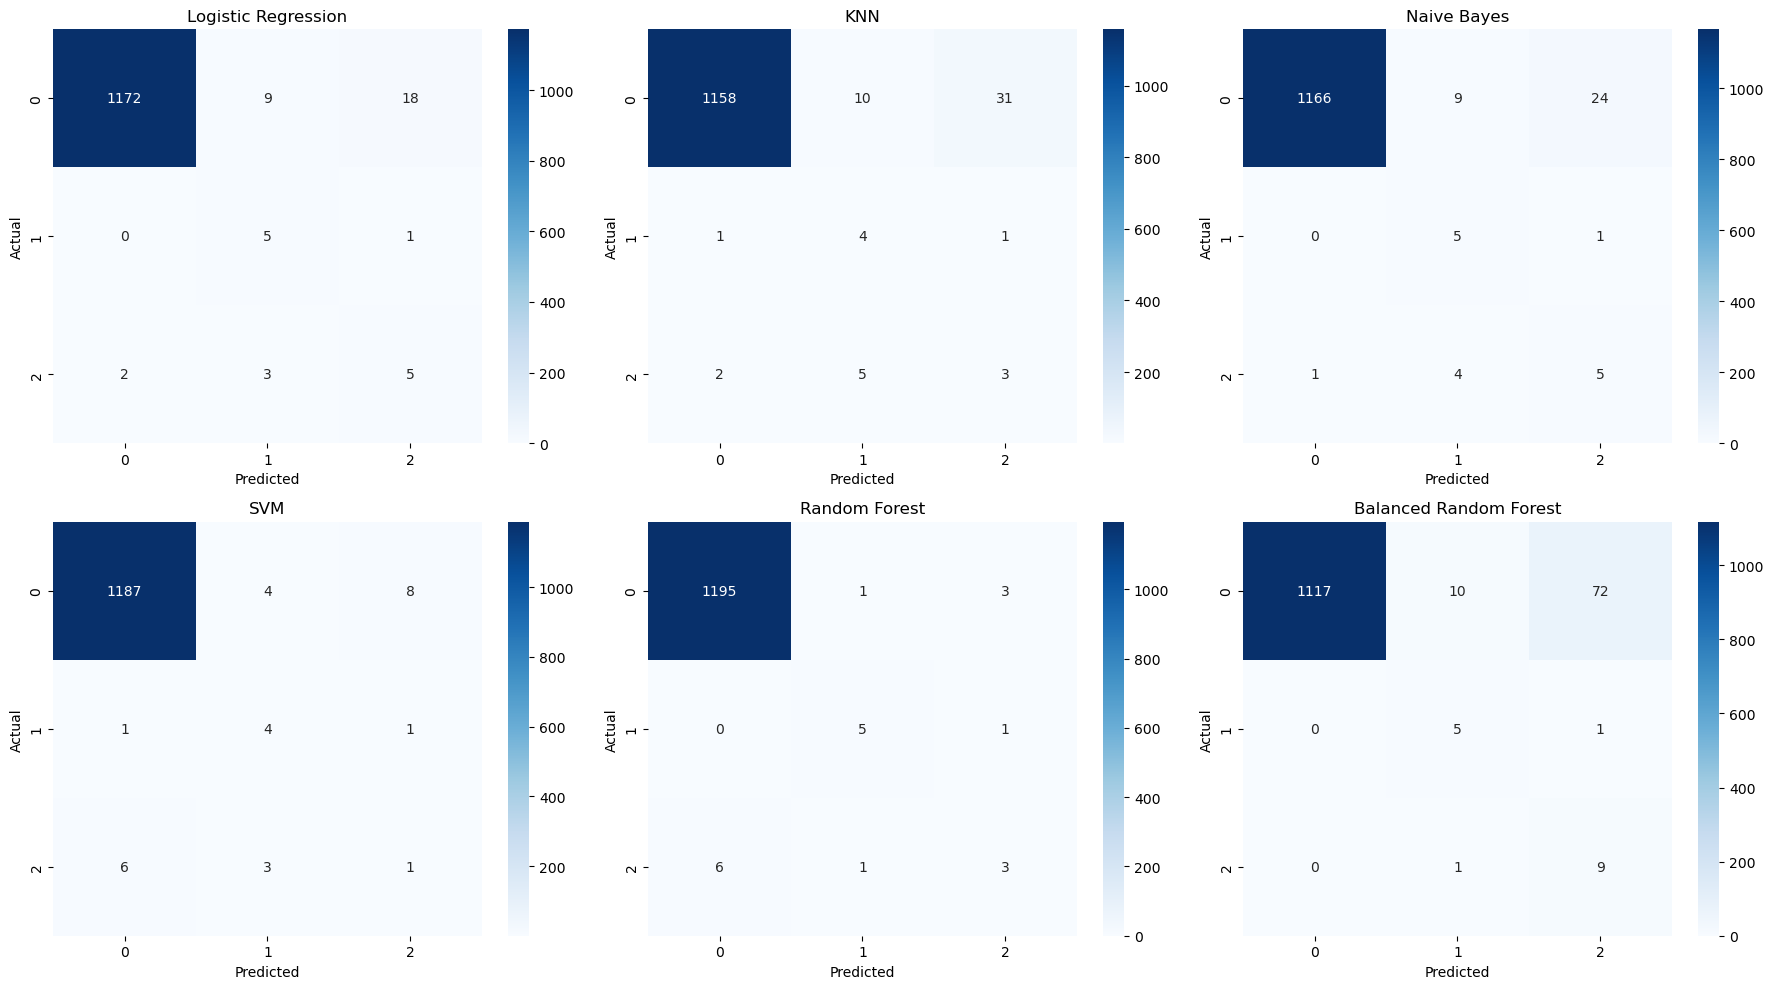

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

models = [
    ("Logistic Regression", y_pred_lr),
    ("KNN", y_pred_knn),
    ("Naive Bayes", y_pred_nb),
    ("SVM", y_pred_svm),
    ("Random Forest", y_pred_rf),
    ("Balanced Random Forest", y_pred_brf),
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, (title, y_pred) in zip(axes, models):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()
